In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/2022/dacon/구내식당식수인원예측경진대회

/content/drive/MyDrive/2022/dacon/구내식당식수인원예측경진대회


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns
import datetime

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
train = pd.read_csv("data/train.csv")
humidity = pd.read_csv("humidity_jinju(최종수정).csv")
weather = pd.read_csv("weather_jinju(최종수정).csv")

In [ ]:
# str -> datetime 타입 변환 및 새 변수 추가
train['일자'] = pd.to_datetime(train['일자'], format='%Y-%m-%d')
train['년도'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2


In [ ]:
train['본사출근자수'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] -  train['현본사소속재택근무자수']

- 실출근자의 38%가 중식을 19%가 석식을 먹는다

In [ ]:
train['공휴일전날']=0

train['공휴일전날'][4]=1 #'16 설연휴
train['공휴일전날'][17]=1 #삼일절
train['공휴일전날'][47]=1 #국회의원 선거
train['공휴일전날'][62]=1 #어린이날
train['공휴일전날'][67]=1 #석가탄신일
train['공휴일전날'][152]=1 #추석연휴
train['공휴일전날'][245]=1 #'17 설연휴
train['공휴일전날'][264]=1 #'17 삼일절
train['공휴일전날'][309]=1 # 석가탄신일
train['공휴일전날'][310]=1 #'17 어린이날
train['공휴일전날'][330]=1 #'17 현충일
train['공휴일전날'][379]=1 #'17 광복절
train['공휴일전날'][502]=1 #'18 설연휴
train['공휴일전날'][510]=1 #'18 삼일절
train['공휴일전날'][552]=1 #'18 근로자의 날
train['공휴일전날'][555]=1 #'18 어린이날
train['공휴일전날'][565]=1 #'18 석가탄신일
train['공휴일전날'][575]=1 #'18 현충일
train['공휴일전날'][579]=1 #'18 지방선거
train['공휴일전날'][623]=1 #'18 광복절
train['공휴일전날'][650]=1 #'18 추석연휴
train['공휴일전날'][651]=1 #'18 한글날
train['공휴일전날'][705]=1 #'18 성탄절
train['공휴일전날'][709]=1 #'19 신정
train['공휴일전날'][732]=1 #'19 설연휴
train['공휴일전날'][748]=1 #'19 삼일절
train['공휴일전날'][790]=1 #'19 근로자의 날
train['공휴일전날'][814]=1 #'19 현충일
train['공휴일전날'][863]=1 #'19 광복절
train['공휴일전날'][882]=1 #'19 추석연휴
train['공휴일전날'][894]=1 #'19 개천절
train['공휴일전날'][897]=1 #'19 한글날
train['공휴일전날'][951]=1 #'19 성탄절
train['공휴일전날'][955]=1 #'20 신정
train['공휴일전날'][971]=1 #'20 설연휴
train['공휴일전날'][995]=1 #'20 삼일절
train['공휴일전날'][1027]=1 #'20 국회의원선거
train['공휴일전날'][1037]=1 #'20 석가탄신일
train['공휴일전날'][1038]=1 #'20 어린이날
train['공휴일전날'][1061]=1 #'20 현충일
train['공휴일전날'][1099]=1 #'20 광복절
train['공휴일전날'][1129]=1 #'20 추석연휴
train['공휴일전날'][1133]=1 #'20 한글날
train['공휴일전날'][1187]=1 #'20 성탄절

train['공휴일전날'][1215]=1 #'21 설연휴
train['공휴일전날'][1225]=1 #'21 삼일절

In [ ]:
train.rename(columns={'일자' : 'date'}, inplace=True)

merge_weather = pd.merge(left = weather, right = humidity, on = "date", how = 'inner') # 습도와 온도 테이블 date을 기준으로 조인
merge_weather['date'] = pd.to_datetime(merge_weather['date'], format='%Y-%m-%d')

merge_weather = merge_weather.drop(['Unnamed: 0_y','Unnamed: 0_x'], axis=1) 
train_weather = pd.merge(left = train, right=merge_weather, on="date", how='inner') # 날씨 테이블과 train 테이블 date을 기준으로 조인

In [ ]:
train_weather.head()

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,2016,2,1,2401.0,0,-0.6,5.0,-4.1,0.0,43.9
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,2016,2,2,2378.0,0,-2.3,6.2,-9.1,0.0,47.5
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,2016,2,3,2365.0,0,-1.7,7.7,-9.3,0.0,57.1
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,2016,2,4,2277.0,0,-0.2,7.7,-7.7,0.0,53.4
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,2016,2,5,2142.0,1,1.3,9.6,-6.5,0.0,44.4


In [ ]:
# 결측치 존재
train_weather[train_weather['humidity']=='\xa0'] 

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity
659,2018-10-19,금,2805,207,303,40,0.0,모닝롤/사과파이 우유/주스 계란후라이 크림누룽지탕/쌀밥 (쌀:국내산) 올갱이아욱국...,쌀밥/잡곡밥 (쌀:국내산) 오징어국 닭갈비 연두부*양념장 호박나물 포기김치 ...,쌀밥/잡곡밥 (쌀:국내산) 닭곰탕 류산슬 비엔나감자구이 아삭고추무침 포기김치...,...,2018,10,19,2295.0,0,NaN,20.8,5.4,0.0,


In [ ]:
# 10/19을 기준으로 하루 전날 값으로 결측치 대체
train_weather['humidity'] = train_weather['humidity'].replace('\xa0', None)
train_weather[train_weather['date']=='2018-10-19']['humidity'] = train_weather[train_weather['date']=='2018-10-18']['humidity']

In [ ]:
train_weather[train_weather['date']=='2018-10-19']

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity
659,2018-10-19,금,2805,207,303,40,0.0,모닝롤/사과파이 우유/주스 계란후라이 크림누룽지탕/쌀밥 (쌀:국내산) 올갱이아욱국...,쌀밥/잡곡밥 (쌀:국내산) 오징어국 닭갈비 연두부*양념장 호박나물 포기김치 ...,쌀밥/잡곡밥 (쌀:국내산) 닭곰탕 류산슬 비엔나감자구이 아삭고추무침 포기김치...,...,2018,10,19,2295.0,0,NaN,20.8,5.4,0.0,60.8


In [ ]:
# str -> float: type 변환
train_weather = train_weather.astype({'avg':'float'})
train_weather = train_weather.astype({'min':'float'})
train_weather = train_weather.astype({'max':'float'})
train_weather = train_weather.astype({'humidity':'float'})

# 결측치 확인
train_weather.isnull().sum()

date              0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
년도                0
월                 0
일                 0
본사출근자수            0
공휴일전날             0
avg               1
max               0
min               0
rain              0
humidity          0
dtype: int64

In [ ]:
# 불쾌지수라는 새로운 변수 추가
train_weather["discomfort"]=(0.81*train_weather['avg'])+(0.01*train_weather['humidity']*(0.99*(train_weather['avg']-14.3))) + 46.3
train_weather.head(2)

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity,discomfort
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,2,1,2401.0,0,-0.6,5.0,-4.1,0.0,43.9,39.338311
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,2,2,2378.0,0,-2.3,6.2,-9.1,0.0,47.5,36.630850


### 모델링

In [ ]:
# 메뉴는 모델링 작업을 위해 drop
df = train_weather.drop(['조식메뉴', '중식메뉴', '석식메뉴'], axis=1)

In [ ]:
# 결측치 확인
df.isnull().sum()

date              0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
중식계               0
석식계               0
년도                0
월                 0
일                 0
본사출근자수            0
공휴일전날             0
avg               1
max               0
min               0
rain              0
humidity          0
discomfort        1
dtype: int64

In [ ]:
# 전체 평균값으로 대체
df['avg']=df['avg'].fillna(df['avg'].mean())
df['discomfort']=df['discomfort'].fillna(df['discomfort'].mean())

In [ ]:
df.head()

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity,discomfort
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1,2401.0,0,-0.6,5.0,-4.1,0.0,43.9,39.338311
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2,2378.0,0,-2.3,6.2,-9.1,0.0,47.5,36.630850
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3,2365.0,0,-1.7,7.7,-9.3,0.0,57.1,35.878360
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4,2277.0,0,-0.2,7.7,-7.7,0.0,53.4,38.472430
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5,2142.0,1,1.3,9.6,-6.5,0.0,44.4,41.638720


In [ ]:
# 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
from sklearn.preprocessing import LabelEncoder

df[df.columns[df.dtypes=='O']] = df[df.columns[df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

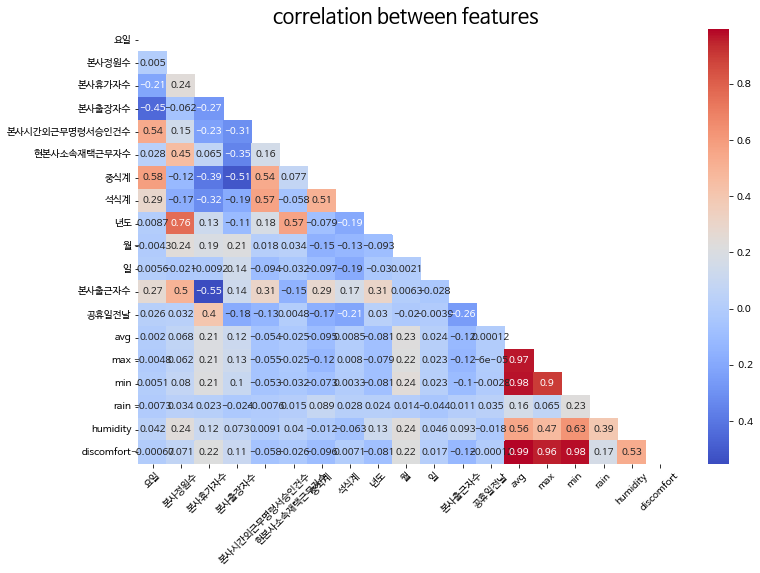

In [ ]:
#상관관계 분석도
plt.figure(figsize=(12,8))

heat_table = df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=20)
plt.show()

In [ ]:
df.corr().loc["중식계"].abs().sort_values(ascending=False)

중식계               1.000000
요일                0.584193
본사시간외근무명령서승인건수    0.535611
본사출장자수            0.512680
석식계               0.508287
본사휴가자수            0.391975
본사출근자수            0.286810
공휴일전날             0.168716
월                 0.154664
max               0.122591
본사정원수             0.115529
일                 0.097392
discomfort        0.095935
avg               0.094816
rain              0.088758
년도                0.078804
현본사소속재택근무자수       0.076509
min               0.072575
humidity          0.012055
Name: 중식계, dtype: float64

In [ ]:
df.corr().loc["석식계"].abs().sort_values(ascending=False)

석식계               1.000000
본사시간외근무명령서승인건수    0.571168
중식계               0.508287
본사휴가자수            0.316894
요일                0.292941
공휴일전날             0.213841
년도                0.194792
본사출장자수            0.188164
일                 0.185565
본사정원수             0.173852
본사출근자수            0.172373
월                 0.127142
humidity          0.063393
현본사소속재택근무자수       0.057534
rain              0.027613
avg               0.008469
max               0.008034
discomfort        0.007098
min               0.003260
Name: 석식계, dtype: float64

In [ ]:
df = df.drop(['humidity', 'min','avg', 'date'], axis=1)  # 최저온도는 상관관계가 거의 없고 # avg, humidity는 discomfort로 #date는 월, 요일, 년도

In [ ]:
X = df.drop(['석식계', '중식계'],axis=1)
y1 = df['중식계']
y2 = df['석식계']

In [ ]:
test = pd.read_csv("data/test.csv")
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [ ]:
#test 데이터셋에 맞는 날씨 데이터
T_humidity = pd.read_csv("humidity_test.csv") 
T_weather = pd.read_csv("weather_test.csv")

In [ ]:
# str -> datetime 타입 변환 및 새 변수 추가
test['일자'] = pd.to_datetime(test['일자'], format='%Y-%m-%d')
test['년도'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day

test['공휴일전날']=0 # test 셋에 공휴일이 존재하지 않음
test['본사출근자수'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] -  test['현본사소속재택근무자수']

In [ ]:
test.rename(columns={'일자' : 'date'}, inplace=True)

# str -> datetime 타입 변환 및 새 변수 추가

merge_weather = pd.merge(left = T_weather, right = T_humidity, on = "date", how = 'inner')  #습도와 온도 테이블 date을 기준으로 조인
merge_weather['date'] = pd.to_datetime(merge_weather['date'], format='%Y-%m-%d')

merge_weather = merge_weather.drop(['Unnamed: 0_y','Unnamed: 0_x'], axis=1)
test_weather = pd.merge(left = test, right=merge_weather, on="date", how='inner')  # test 데이터와 날씨 테이블 date을 기준으로 조인

In [ ]:
# 불쾌지수 새 변수 추가
test_weather["discomfort"]=(0.81*test_weather['avg'])+(0.01*test_weather['humidity']*(0.99*(test_weather['avg']-14.3))) + 46.3

In [ ]:
# 요일 라벨 인코딩
test_weather[test_weather.columns[test_weather.dtypes=='O']] = test_weather[test_weather.columns[test_weather.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
X_test =test_weather.drop(['humidity', 'min','avg', 'date','조식메뉴','중식메뉴','석식메뉴'], axis=1) 

In [ ]:
target =test_weather[X.columns]

In [ ]:
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [ ]:
! pip install catboost

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### 중식계

In [ ]:
# GradientBoostingRegressor

gbr_pred1 = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]

    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.05, n_estimators = 1000)
    gbr.fit(tr_x, tr_y)
    
    val_pred = gbr.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    gbr_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')

    
    fold_pred = gbr.predict(target) / 10
    gbr_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(gbr_val)} & std = {np.std(gbr_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.8133342009081842

2 FOLD Training.....
2 FOLD R2 = 0.8084335596907107

3 FOLD Training.....
3 FOLD R2 = 0.8023772440616648

4 FOLD Training.....
4 FOLD R2 = 0.7504993278616343

5 FOLD Training.....
5 FOLD R2 = 0.8502494872209672

6 FOLD Training.....
6 FOLD R2 = 0.8722909681079271

7 FOLD Training.....
7 FOLD R2 = 0.811472435704828

8 FOLD Training.....
8 FOLD R2 = 0.8229874102111662

9 FOLD Training.....
9 FOLD R2 = 0.8484767742540932

10 FOLD Training.....
10 FOLD R2 = 0.8276342292483844

10FOLD Mean of R2 = 0.820775563726956 & std = 0.03148544791815908


In [ ]:
# RandomForestRegressor
rf_pred1 = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = rf.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    rf_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    fold_pred = rf.predict(target) / 10
    rf_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(rf_val)} & std = {np.std(rf_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.7646467899426618

2 FOLD Training.....
2 FOLD R2 = 0.7659039117674242

3 FOLD Training.....
3 FOLD R2 = 0.7784236921828166

4 FOLD Training.....
4 FOLD R2 = 0.7619622300294246

5 FOLD Training.....
5 FOLD R2 = 0.8386725207776291

6 FOLD Training.....
6 FOLD R2 = 0.848814980507832

7 FOLD Training.....
7 FOLD R2 = 0.8000532405230563

8 FOLD Training.....
8 FOLD R2 = 0.7525164943094982

9 FOLD Training.....
9 FOLD R2 = 0.8382234936586894

10 FOLD Training.....
10 FOLD R2 = 0.8296878975093744

10FOLD Mean of R2 = 0.7978905251208406 & std = 0.03571534951993675


In [ ]:
# CatBoostRegressor
cb_pred1 = np.zeros(target.shape[0])
cb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]
    
    tr_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    
    cb = CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
    cb.fit(tr_data, eval_set = val_data, early_stopping_rounds = 750, verbose = 1000)
    
    val_pred = cb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    cb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = cb.predict(target) / 10
    cb_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(cb_val)} & std = {np.std(cb_val)}')

1 FOLD Training.....
0:	learn: 164.1847500	test: 166.2075197	best: 166.2075197 (0)	total: 1.97ms	remaining: 5.9s
1000:	learn: 43.5317478	test: 65.8992146	best: 65.8992146 (1000)	total: 1.41s	remaining: 2.81s
2000:	learn: 36.6526072	test: 65.6997714	best: 65.6267451 (1879)	total: 3.48s	remaining: 1.74s
2999:	learn: 33.6889474	test: 65.5876295	best: 65.5445807 (2974)	total: 4.75s	remaining: 0us

bestTest = 65.54458074
bestIteration = 2974

Shrink model to first 2975 iterations.
1 FOLD R2 = 0.8203489786588212

2 FOLD Training.....
0:	learn: 165.3341227	test: 156.8958668	best: 156.8958668 (0)	total: 1.42ms	remaining: 4.25s
1000:	learn: 43.2664026	test: 66.2017214	best: 66.0226236 (875)	total: 1.45s	remaining: 2.9s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 66.02262356
bestIteration = 875

Shrink model to first 876 iterations.
2 FOLD R2 = 0.8068493615268653

3 FOLD Training.....
0:	learn: 164.4138275	test: 165.0261148	best: 165.0261148 (0)	total: 1.5ms	remaining: 4.5

In [ ]:
! pip install ngboost

In [ ]:
# NGBRegressor
from ngboost import NGBRegressor

ngb_pred1 = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = ngb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    ngb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(ngb_val)} & std = {np.std(ngb_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.8067172550487398

2 FOLD Training.....
2 FOLD R2 = 0.8086028819410165

3 FOLD Training.....
3 FOLD R2 = 0.8046622992231365

4 FOLD Training.....
4 FOLD R2 = 0.7541094754481725

5 FOLD Training.....
5 FOLD R2 = 0.8575971797185774

6 FOLD Training.....
6 FOLD R2 = 0.8806274334553806

7 FOLD Training.....
7 FOLD R2 = 0.823072845479326

8 FOLD Training.....
8 FOLD R2 = 0.8255622930552089

9 FOLD Training.....
9 FOLD R2 = 0.8512753966611116

10 FOLD Training.....
10 FOLD R2 = 0.8361094380282199

10FOLD Mean of R2 = 0.824833649805889 & std = 0.03319151958454282


#### 석식계

In [ ]:
#GradientBoostingRegressor

gbr_pred2 = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]

    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.05, n_estimators = 1000)
    gbr.fit(tr_x, tr_y)
    
    val_pred = gbr.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    gbr_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')

    fold_pred = gbr.predict(target) / 10
    gbr_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(gbr_val)} & std = {np.std(gbr_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.7313767918221143

2 FOLD Training.....
2 FOLD R2 = 0.680287994561589

3 FOLD Training.....
3 FOLD R2 = 0.6804932223081532

4 FOLD Training.....
4 FOLD R2 = 0.6542812907389361

5 FOLD Training.....
5 FOLD R2 = 0.5423559289330706

6 FOLD Training.....
6 FOLD R2 = 0.6378339235531233

7 FOLD Training.....
7 FOLD R2 = 0.7117007699434696

8 FOLD Training.....
8 FOLD R2 = 0.671865316247907

9 FOLD Training.....
9 FOLD R2 = 0.5739640512607602

10 FOLD Training.....
10 FOLD R2 = 0.7286742430886639

10FOLD Mean of R2 = 0.6612833532457787 & std = 0.05933465164532434


In [ ]:
# RandomForestRegressor
rf_pred2 = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = rf.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    rf_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    fold_pred = rf.predict(target) / 10
    rf_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(rf_val)} & std = {np.std(rf_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.11064037815201568

2 FOLD Training.....
2 FOLD NMAE = 0.11731383636684926

3 FOLD Training.....
3 FOLD NMAE = 0.12310830461008186

4 FOLD Training.....
4 FOLD NMAE = 0.09318227410289666

5 FOLD Training.....
5 FOLD NMAE = 0.113577190987277

6 FOLD Training.....
6 FOLD NMAE = 0.12925182969175705

7 FOLD Training.....
7 FOLD NMAE = 0.10249038910645637

8 FOLD Training.....
8 FOLD NMAE = 0.13688516791044775

9 FOLD Training.....
9 FOLD NMAE = 0.12333368989677489

10 FOLD Training.....
10 FOLD NMAE = 0.1341374224776887

10FOLD Mean of NMAE = 0.11839204833022454 & std = 0.013142828045083137


In [ ]:
# CatBoostRegressor
cb_pred2 = np.zeros(target.shape[0])
cb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]
    
    tr_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    
    cb = CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
    cb.fit(tr_data, eval_set = val_data, early_stopping_rounds = 750, verbose = 1000)
    
    val_pred = cb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    cb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = cb.predict(target) / 10
    cb_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(cb_val)} & std = {np.std(cb_val)}')

1 FOLD Training.....
0:	learn: 97.2484215	test: 96.5906602	best: 96.5906602 (0)	total: 1.83ms	remaining: 5.48s
1000:	learn: 38.4624714	test: 54.2328010	best: 54.2001921 (993)	total: 1.32s	remaining: 2.64s
2000:	learn: 32.2408595	test: 53.4054838	best: 53.2938463 (1853)	total: 2.61s	remaining: 1.3s
2999:	learn: 28.8557390	test: 52.9317369	best: 52.9125184 (2975)	total: 3.95s	remaining: 0us

bestTest = 52.91251844
bestIteration = 2975

Shrink model to first 2976 iterations.
1 FOLD R2 = 0.652809453468908

2 FOLD Training.....
0:	learn: 97.3587167	test: 93.8667759	best: 93.8667759 (0)	total: 1.94ms	remaining: 5.81s
1000:	learn: 38.6462879	test: 58.8755995	best: 58.7234770 (823)	total: 1.34s	remaining: 2.67s
2000:	learn: 33.0852442	test: 58.3669659	best: 58.2296639 (1623)	total: 2.69s	remaining: 1.34s
2999:	learn: 29.6145871	test: 57.9588889	best: 57.9084248 (2398)	total: 3.97s	remaining: 0us

bestTest = 57.90842478
bestIteration = 2398

Shrink model to first 2399 iterations.
2 FOLD R2 = 0.

In [ ]:
from ngboost import NGBRegressor

# NGBRegressor
ngb_pred2 = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = ngb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    ngb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(ngb_val)} & std = {np.std(ngb_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.7469089482992428

2 FOLD Training.....
2 FOLD R2 = 0.7081926842815894

3 FOLD Training.....
3 FOLD R2 = 0.7191620034576782

4 FOLD Training.....
4 FOLD R2 = 0.6171634526852642

5 FOLD Training.....
5 FOLD R2 = 0.5718600617967762

6 FOLD Training.....
6 FOLD R2 = 0.61499175726401

7 FOLD Training.....
7 FOLD R2 = 0.7158998323856558

8 FOLD Training.....
8 FOLD R2 = 0.6938439301692119

9 FOLD Training.....
9 FOLD R2 = 0.5649618586311456

10 FOLD Training.....
10 FOLD R2 = 0.6655981816410135

10FOLD Mean of R2 = 0.6618582710611588 & std = 0.061890598867337596


#### 결과

In [ ]:
lunch = (ngb_pred1 + cb_pred1 + rf_pred1 + gbr_pred1) / 4
lunch

array([1000.10389299,  947.10882042,  582.82411687, 1229.27193099,
       1018.56300768,  924.95819134,  950.79918865,  674.42837111,
       1289.07625126, 1045.2239784 ,  803.80963258, 1262.39265274,
       1116.65675342, 1021.97910422,  832.25285266,  646.92005234,
       1205.76376541, 1021.68504924,  872.38489171,  828.95336771,
        588.72366476, 1096.0520706 ,  994.1883183 ,  934.67410292,
        631.62573672, 1273.28402614, 1139.33536217,  999.16883974,
        927.88398523,  705.27945252, 1251.4299206 , 1000.9607914 ,
       1017.18016292,  909.69957283,  619.89968939, 1229.02060099,
        988.46376345,  892.34807278,  806.31005082,  565.35638358,
       1194.84068543,  990.87928623,  964.7425976 ,  808.37983086,
        605.32623428, 1205.49334968, 1003.31472155,  971.24916533,
        872.50969267,  590.91354704])

In [ ]:
dinner = (ngb_pred2 + cb_pred2 + rf_pred2 + gbr_pred2) / 4
dinner

array([226.63731585, 414.49696188, 267.44029306, 560.99357559,
       506.94772931, 384.15737647, 478.90194404, 391.06533517,
       638.61765202, 539.62302991, 281.94783106, 698.95628076,
       673.62547051, 425.51018878, 531.17965957, 365.00969285,
       655.36777004, 631.77154772, 333.96507481, 520.46938841,
       292.54621157, 636.98167993, 441.14119013, 567.13908578,
       369.70425227, 678.57042635, 671.13045124, 419.67801764,
       521.69444331, 307.647755  , 694.76045831, 586.44765289,
       419.4922774 , 478.121302  , 302.92390827, 620.29773936,
       573.45018515, 330.2510912 , 443.0959495 , 273.3055901 ,
       616.07919709, 581.13821494, 228.04442439, 422.8712835 ,
       299.93354239, 582.39001702, 567.29656031, 388.43775091,
       452.69356771, 297.94486821])

In [ ]:
submit = pd.read_csv("data/sample_submission.csv")
submit['중식계'] = lunch
submit['석식계'] = dinner

In [ ]:
submit # 예측 결과

,일자,중식계,석식계
0,2021-01-27,1000.103893,226.637316
1,2021-01-28,947.108820,414.496962
2,2021-01-29,582.824117,267.440293
3,2021-02-01,1229.271931,560.993576
4,2021-02-02,1018.563008,506.947729
5,2021-02-03,924.958191,384.157376
6,2021-02-04,950.799189,478.901944
7,2021-02-05,674.428371,391.065335
8,2021-02-08,1289.076251,638.617652
9,2021-02-09,1045.223978,539.623030


- 중식계, 석식계 2개 예측해야하므로 2번 진행
- 모델링은 자세히 설명하지 말고 어떤 모델 모델을 사용했고 앙상블로 진행 정도로만 말하고 갑시다
- R2: 중식계는 평균 0.88/ 석식계는 0.66 
- R2 1에 가까울 수록 좋은 것
- 중식이 더 잘 예측된다 